# Toy neural network example

We train a neural network giving for u in <0,1> a point (x,y) with coordinates 

$x = cos(2\pi u)$

$y = sin(2\pi u)$

that is, a point on a unit circle. The network will work as a random "transformer", transforming a random u in <0,1> to a random point on a unit circle. 

We trained the network in the Grid_search_cycle notebook and saved grid optimization data to a json file.

Here, we will retrieve and analyze the data.

I will show a zoo of various plot styles using matplotlib and seaborn packages. 

# Tasks:
### 1. Study the code.
There are several things that can be new:
- numpy arrays: notice how we can operate on arrays - square them, take a sine or cosine, reshape them
- pandas dataframes: notice how we can pack several arrays into a data table - a pandas DataFrame.
- matplotlib plots: notice how simply we plot things, and
- seaborn plots that add some more plotting functionality.

### 2. Analyze the data.
- Make a comprehensive package of plots and tables that we can use for other similar trainings. 


## 0. Includes

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Retrieve data

In [2]:
results = pd.read_json('../data/grid_results.json')
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_hidden_layer_size,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,5.567952,0.012632,0.999914,0.999913,0.000001,70,"{'alpha': 1e-06, 'hidden_layer_sizes': [70, 70]}",17,0.999958,0.999959,0.999888,0.999885,0.999897,0.999896,0.157513,4.697969e-04,0.000031,0.000032
1,5.569820,0.013297,0.999927,0.999926,0.000001,80,"{'alpha': 1e-06, 'hidden_layer_sizes': [80, 80]}",8,0.999974,0.999974,0.999918,0.999915,0.999889,0.999889,0.518062,1.244198e-03,0.000035,0.000035
10,4.666850,0.015958,0.999944,0.999944,0.000100,90,"{'alpha': 0.0001, 'hidden_layer_sizes': [90, 90]}",3,0.999977,0.999977,0.999895,0.999892,0.999961,0.999963,0.282002,8.135205e-04,0.000035,0.000037
11,5.251947,0.016622,0.999936,0.999937,0.000100,100,"{'alpha': 0.0001, 'hidden_layer_sizes': [100, ...",5,0.999959,0.999960,0.999910,0.999911,0.999939,0.999939,0.493507,4.703595e-04,0.000020,0.000020
12,5.737320,0.011967,0.999957,0.999958,0.001000,70,"{'alpha': 0.001, 'hidden_layer_sizes': [70, 70]}",2,0.999958,0.999959,0.999954,0.999955,0.999959,0.999960,0.296298,5.150000e-07,0.000002,0.000002


## 2. Fancy table - seaborn heatmap
We just cross-tabulate and colour fields according to values.

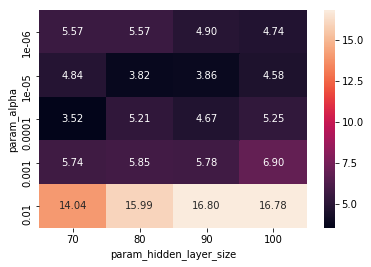

In [3]:
def make_heatmap(d, xname = 'param_hidden_layer_size', yname = 'param_alpha', valname = '', fmt = 'd'):
    '''Plot a heatmap using columns of dataframe d.'''
    table = pd.pivot_table(d, values = valname, index = yname, columns = xname, aggfunc = np.mean)
    sns.heatmap(table, annot = True, fmt = fmt)
    
make_heatmap(results, valname = 'mean_fit_time', fmt = '.2f')

This is good for non-sensitive data, such as training time. For score, we need to see standard deviations, and this we cannot do with this plot.

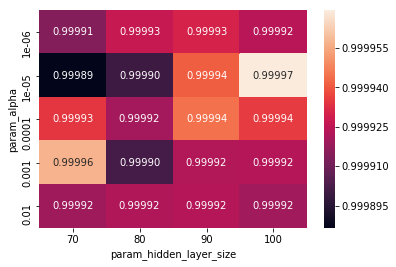

In [4]:
make_heatmap(results, valname = 'mean_test_score', fmt = '.5f')

## 3. Labelled scatterplot

Let us try something less fancy, but more useful.

In [5]:
means = ['mean_fit_time', 'mean_test_score']
stds = [s.replace('mean', 'std') for s in means]

In [6]:
results['params'] = results.apply(lambda row : 'alpha: {alpha}, sizes: {hidden_layer_sizes}'.format(**row.params), axis = 1)
results['params'] = results['params'].astype('category')

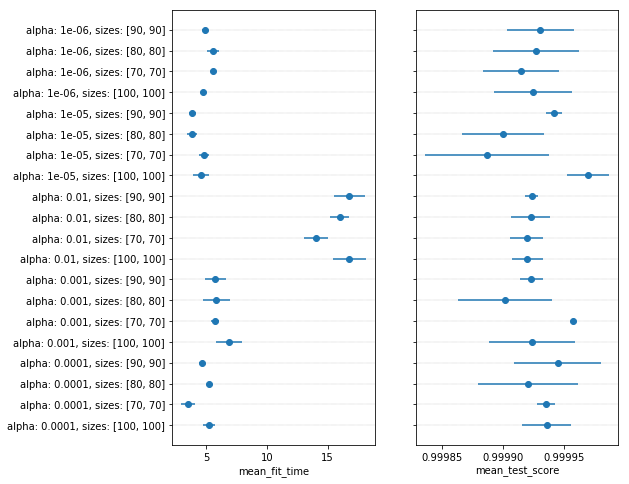

In [13]:
# We sort values by mean score rank (best on top) - DOESN'T WORK
plt_results = results.sort_values(by = ['rank_test_score'], ascending = True)
# Subplot frame
fig, ax = plt.subplots(nrows = 1, ncols = len(means), sharey = True, figsize = (8,8))
# Individual subplots
for subax, i in zip(ax, range(len(means))):
    xdata = plt_results[means[i]]
    ydata = plt_results['params']
    xerrors = plt_results[stds[i]]
    subax.errorbar(x = xdata, y = ydata, xerr = xerrors, fmt = 'o')
    subax.grid(color = 'k', linestyle = ':', linewidth = 0.2, axis = 'y')
    subax.set_xlabel(means[i])